#Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

#Import Dataset

Under sample the higher category

Apply SMOTE on lower category



In [3]:
data=pd.read_csv(r'C:\Users\Bhavishya Koluguri\OneDrive\Documents\Data Mining\Datasets\train.csv')

In [4]:
data.shape

(381109, 12)

In [5]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [8]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

No missing data present

<font size="+3" color='#540b11'><b> Exploratory Data Analysis </b></font>

In [9]:
data.columns = data.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

C:\Users\Bhavishya Koluguri\AppData\Local\Temp\ipykernel_16284\419615359.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Interested (87.7%)', 'Not Interested (12.1%)'])


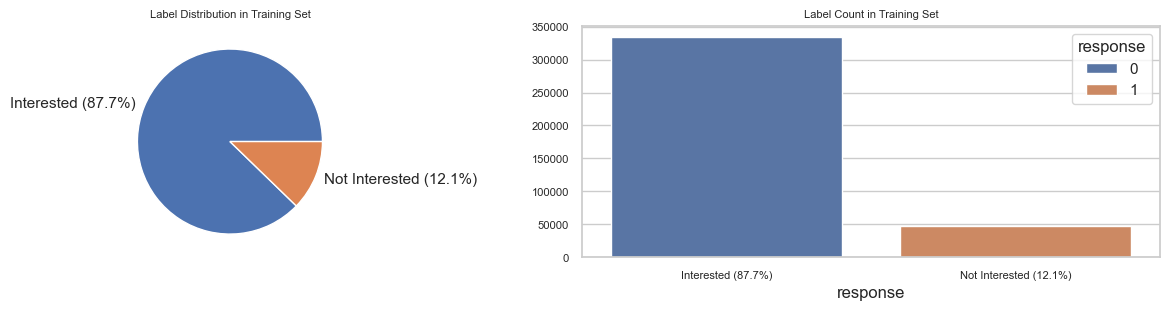

In [10]:
fig, axes = plt.subplots(ncols = 2, figsize = (13, 3), dpi = 100)
plt.tight_layout()

data.groupby('response').count()['id'].plot(kind = 'pie', ax = axes[0], labels = ['Interested (87.7%)', 'Not Interested (12.1%)'])
sns.countplot(x = data['response'], hue = data['response'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Interested (87.7%)', 'Not Interested (12.1%)'])
axes[0].tick_params(axis = 'x', labelsize = 8)
axes[0].tick_params(axis = 'y', labelsize = 8)
axes[1].tick_params(axis = 'x', labelsize = 8)
axes[1].tick_params(axis = 'y', labelsize = 8)

axes[0].set_title('Label Distribution in Training Set', fontsize = 8)
axes[1].set_title('Label Count in Training Set', fontsize =8)

plt.show()

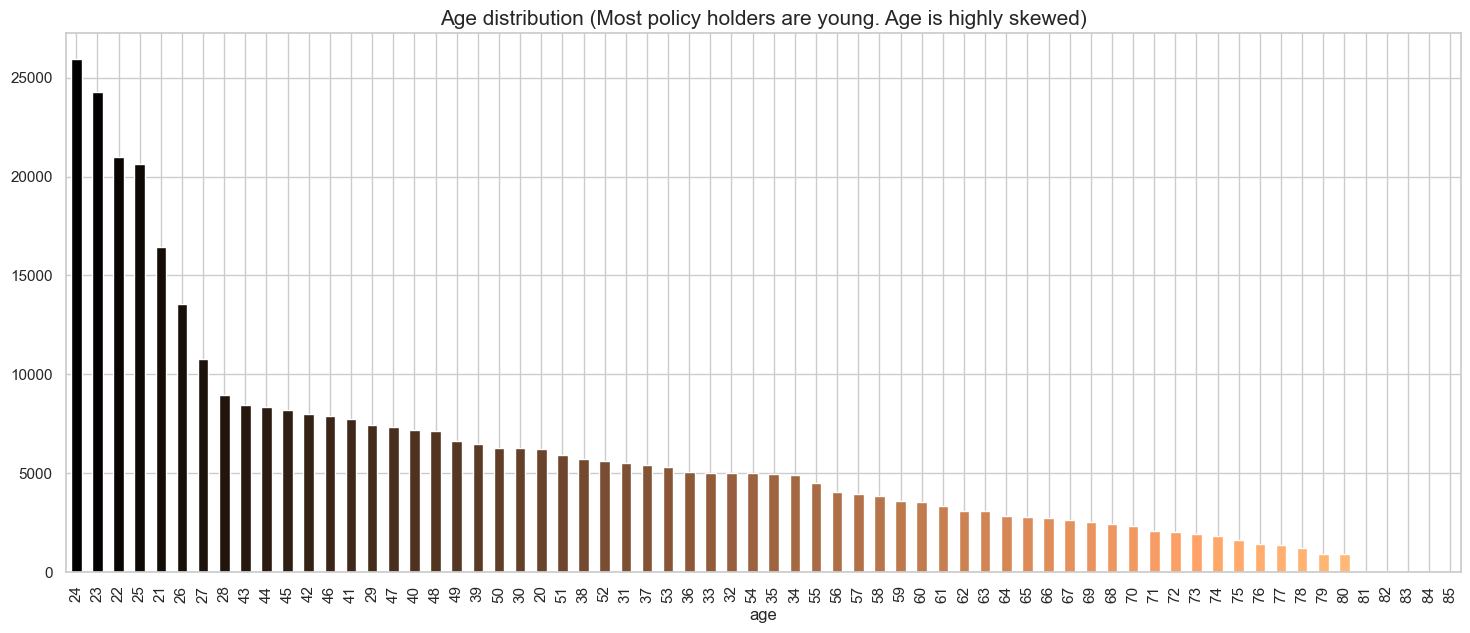

In [11]:
# looking at the frequency of records by age

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 66))
data['age'].value_counts().head(66).plot.bar(color = color)
plt.title('Age distribution (Most policy holders are young. Age is highly skewed)', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

C:\Users\Bhavishya Koluguri\AppData\Local\Temp\ipykernel_16284\1711498494.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['annual_premium'])


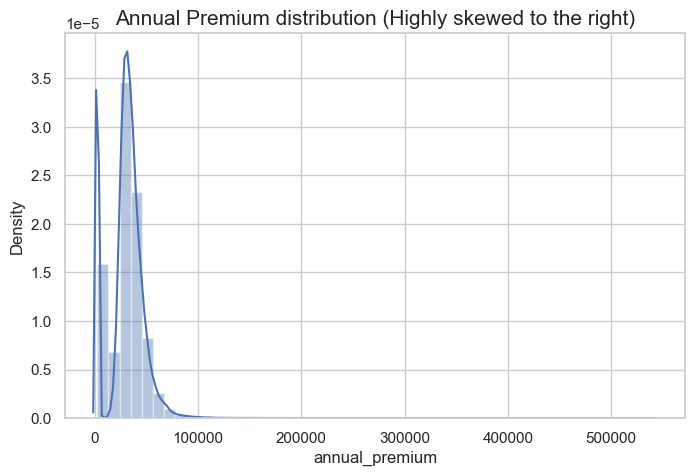

In [12]:
plt.figure(figsize = (8, 5))
sns.distplot(data['annual_premium'])
plt.title('Annual Premium distribution (Highly skewed to the right)', fontsize = 15)
plt.show()

C:\Users\Bhavishya Koluguri\AppData\Local\Temp\ipykernel_16284\1635215533.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[(data['gender'] == 'Male'), 'age'], kde_kws = {"color": "b", "lw": 1, "label": "Male"})
C:\Users\Bhavishya Koluguri\AppData\Local\Temp\ipykernel_16284\1635215533.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwas

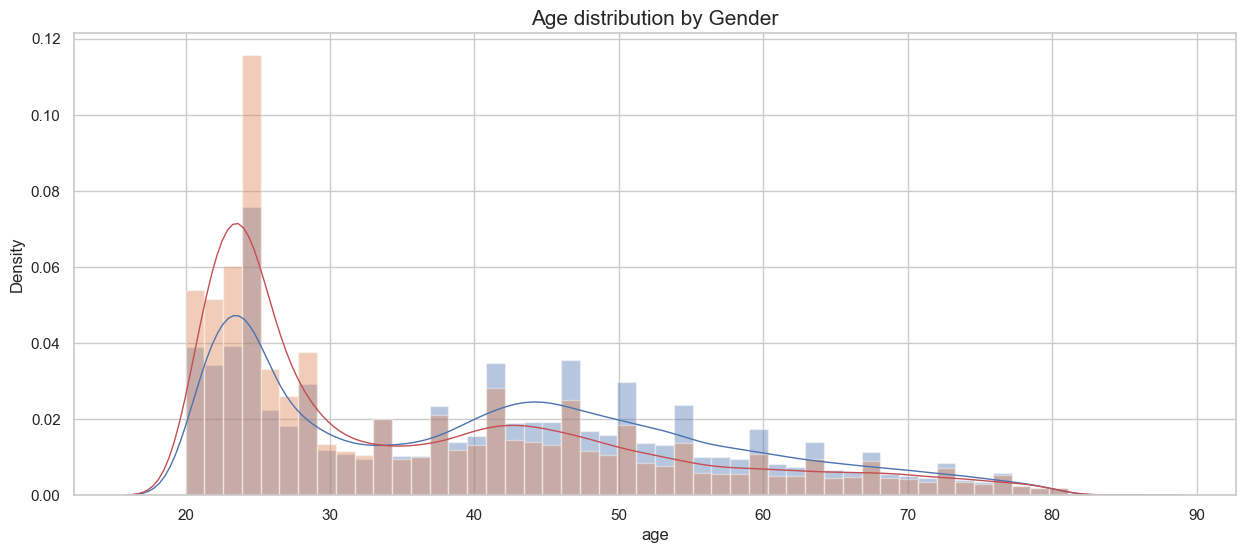

In [13]:
plt.figure(figsize = (15, 6))
sns.distplot(data.loc[(data['gender'] == 'Male'), 'age'], kde_kws = {"color": "b", "lw": 1, "label": "Male"})
sns.distplot(data.loc[(data['gender'] == 'Female'), 'age'], kde_kws = {"color": "r", "lw": 1, "label": "Female"})
plt.title('Age distribution by Gender', fontsize = 15)
plt.show()

C:\Users\Bhavishya Koluguri\AppData\Local\Temp\ipykernel_16284\3311567505.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[(data['gender'] == 'Male'), 'annual_premium'], kde_kws = {"color": "b", "lw": 1, "label": "Male"})
C:\Users\Bhavishya Koluguri\AppData\Local\Temp\ipykernel_16284\3311567505.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.gith

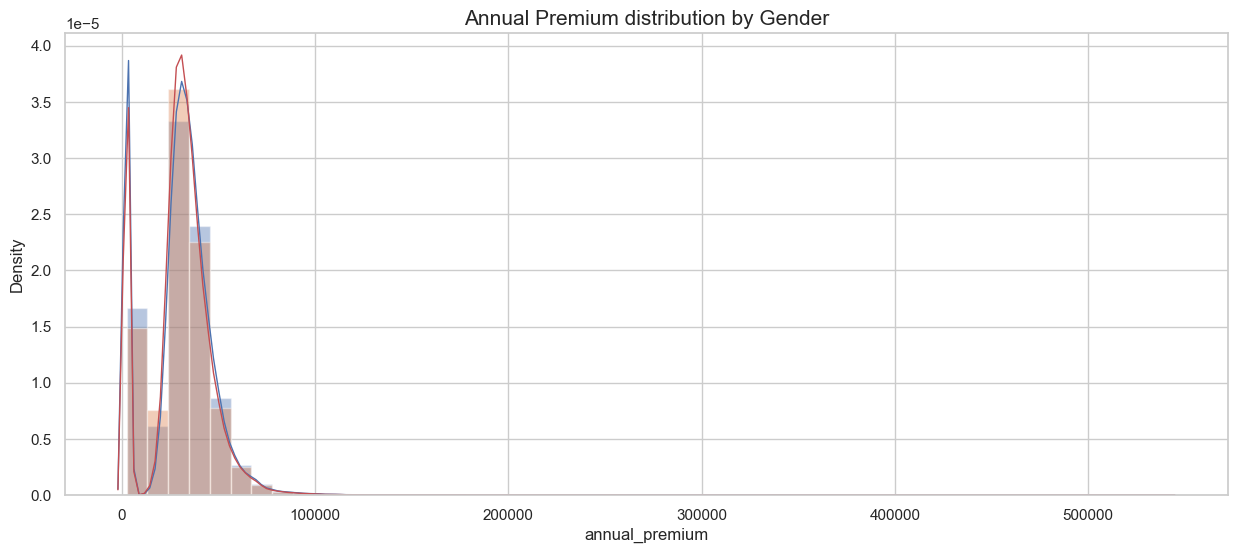

In [14]:
plt.figure(figsize = (15, 6))
sns.distplot(data.loc[(data['gender'] == 'Male'), 'annual_premium'], kde_kws = {"color": "b", "lw": 1, "label": "Male"})
sns.distplot(data.loc[(data['gender'] == 'Female'), 'annual_premium'], kde_kws = {"color": "r", "lw": 1, "label": "Female"})
plt.title('Annual Premium distribution by Gender', fontsize = 15)
plt.show()

C:\Users\Bhavishya Koluguri\AppData\Local\Temp\ipykernel_16284\1450949544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[(data['driving_license'] == 0), 'age'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
C:\Users\Bhavishya Koluguri\AppData\Local\Temp\ipykernel_16284\1450949544.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
http

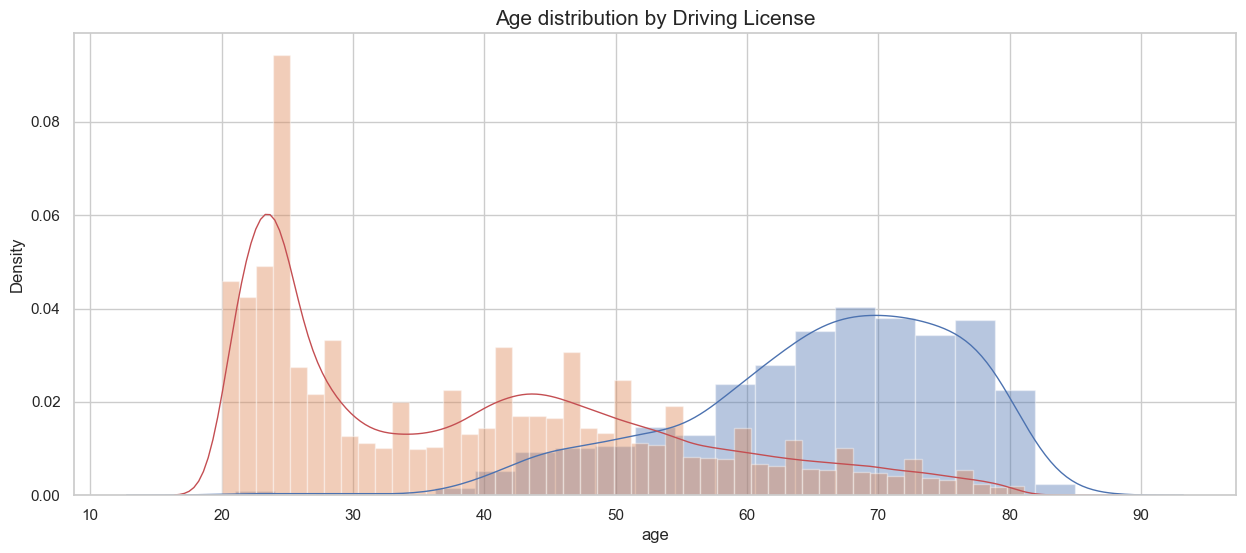

In [15]:
plt.figure(figsize = (15, 6))
sns.distplot(data.loc[(data['driving_license'] == 0), 'age'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
sns.distplot(data.loc[(data['driving_license'] == 1), 'age'], kde_kws = {"color": "r", "lw": 1, "label": "Licensed for Driving"})
plt.title('Age distribution by Driving License', fontsize = 15)
plt.show()

C:\Users\Bhavishya Koluguri\AppData\Local\Temp\ipykernel_16284\1488070766.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[(data['driving_license'] == 0), 'annual_premium'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
C:\Users\Bhavishya Koluguri\AppData\Local\Temp\ipykernel_16284\1488070766.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, plea

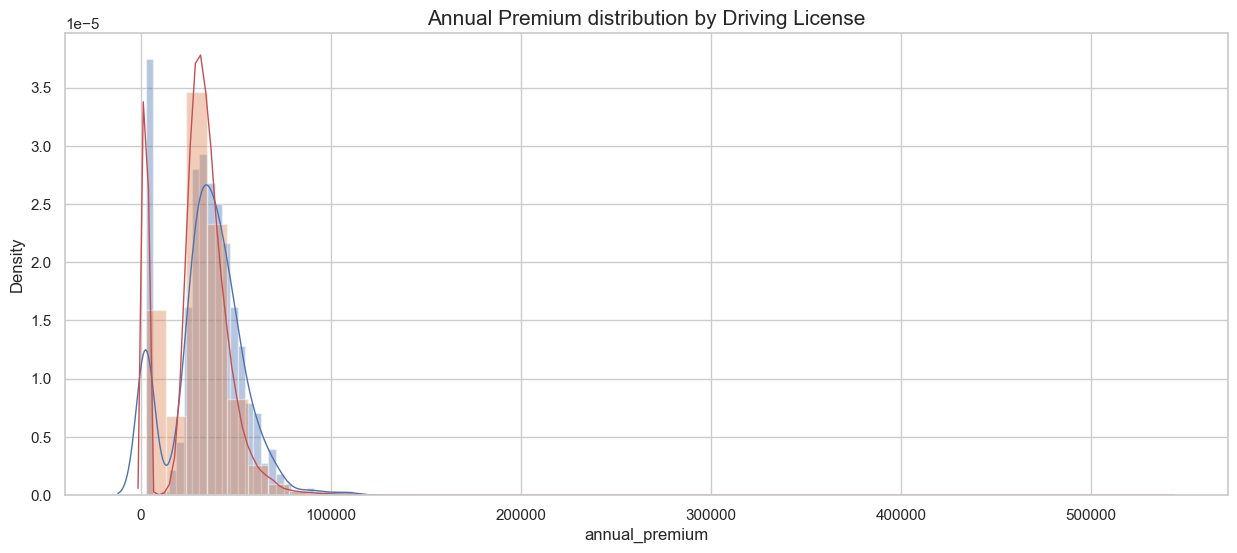

In [16]:
plt.figure(figsize = (15, 6))
sns.distplot(data.loc[(data['driving_license'] == 0), 'annual_premium'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
sns.distplot(data.loc[(data['driving_license'] == 1), 'annual_premium'], kde_kws = {"color": "r", "lw": 1, "label": "Licensed for Driving"})
plt.title('Annual Premium distribution by Driving License', fontsize = 15)
plt.show()

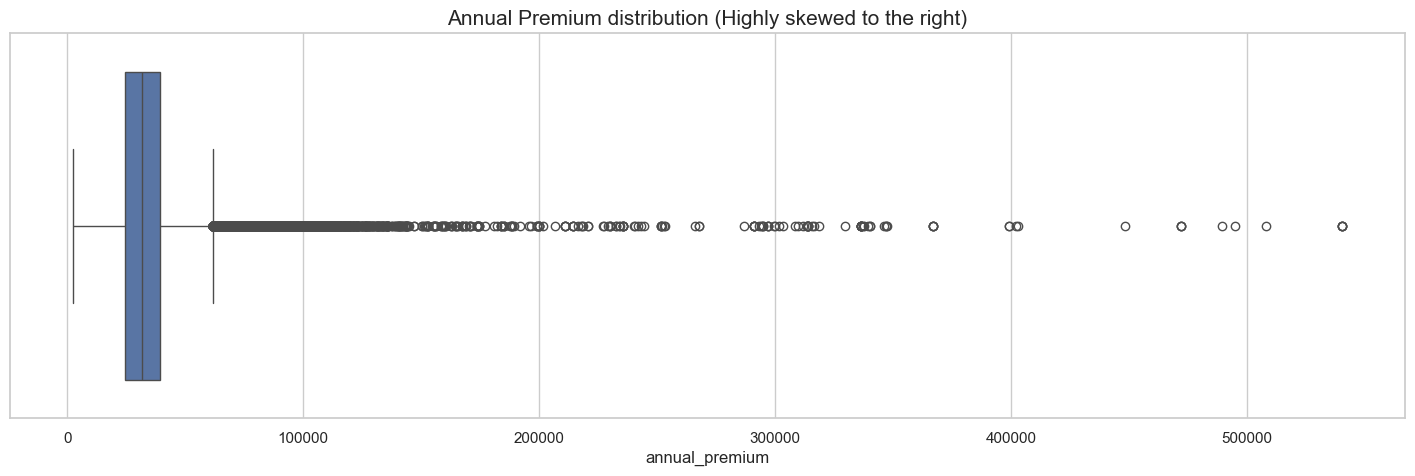

In [17]:
plt.figure(figsize = (18, 5))
sns.boxplot(data['annual_premium'], orient="h")
plt.title('Annual Premium distribution (Highly skewed to the right)', fontsize = 15)
plt.show()

C:\Users\Bhavishya Koluguri\AppData\Local\Temp\ipykernel_16284\2210601251.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['vintage'])


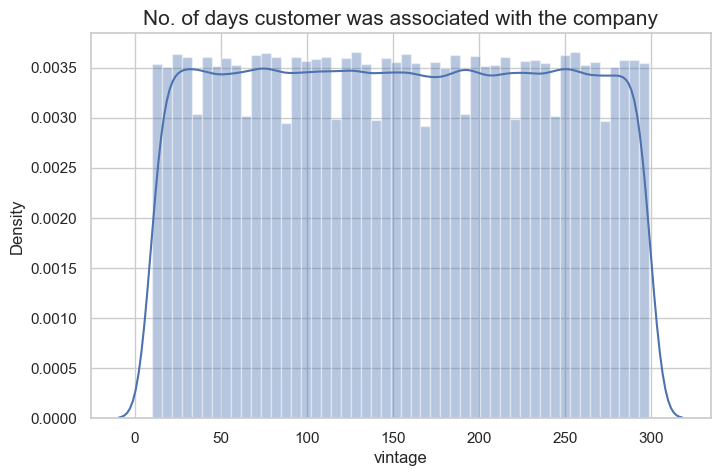

In [18]:
plt.figure(figsize = (8, 5))
sns.distplot(data['vintage'])
plt.title('No. of days customer was associated with the company', fontsize = 15)
plt.show()

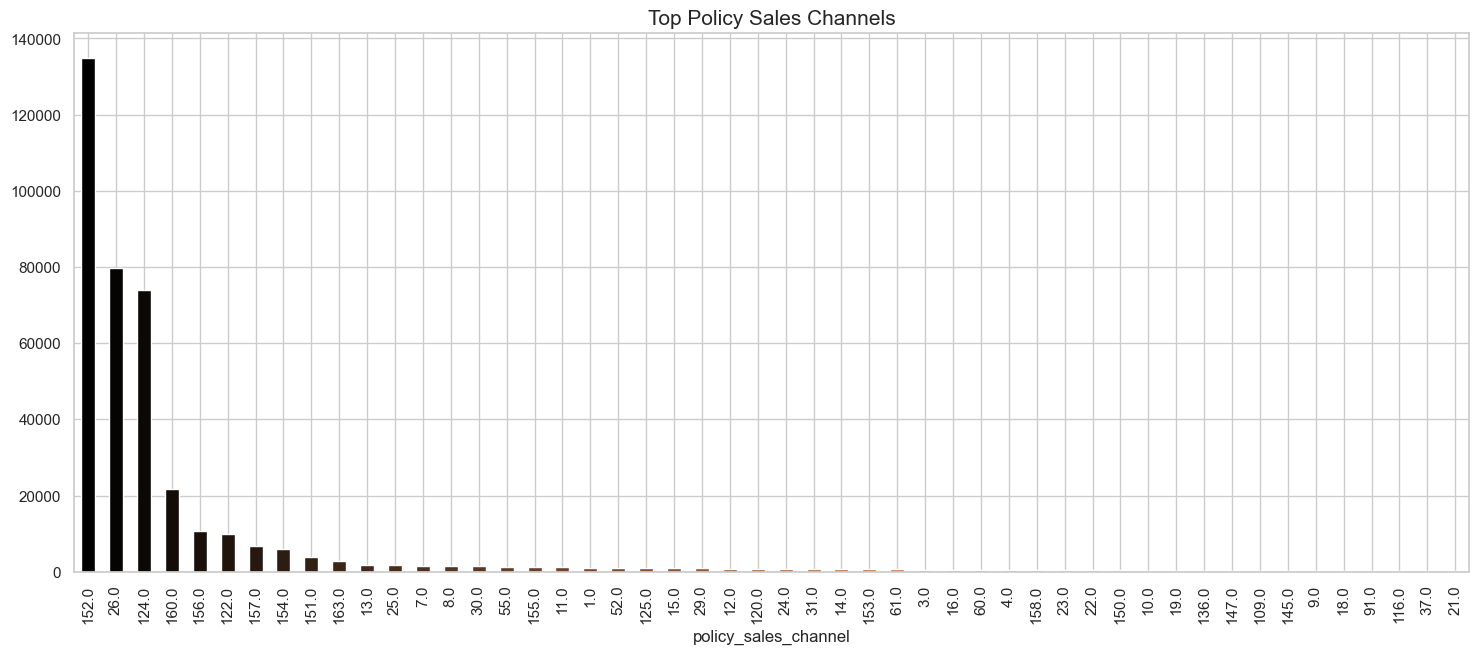

In [19]:
# looking at the frequency of records by age

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 50))
data['policy_sales_channel'].value_counts().head(50).plot.bar(color = color)
plt.title('Top Policy Sales Channels', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

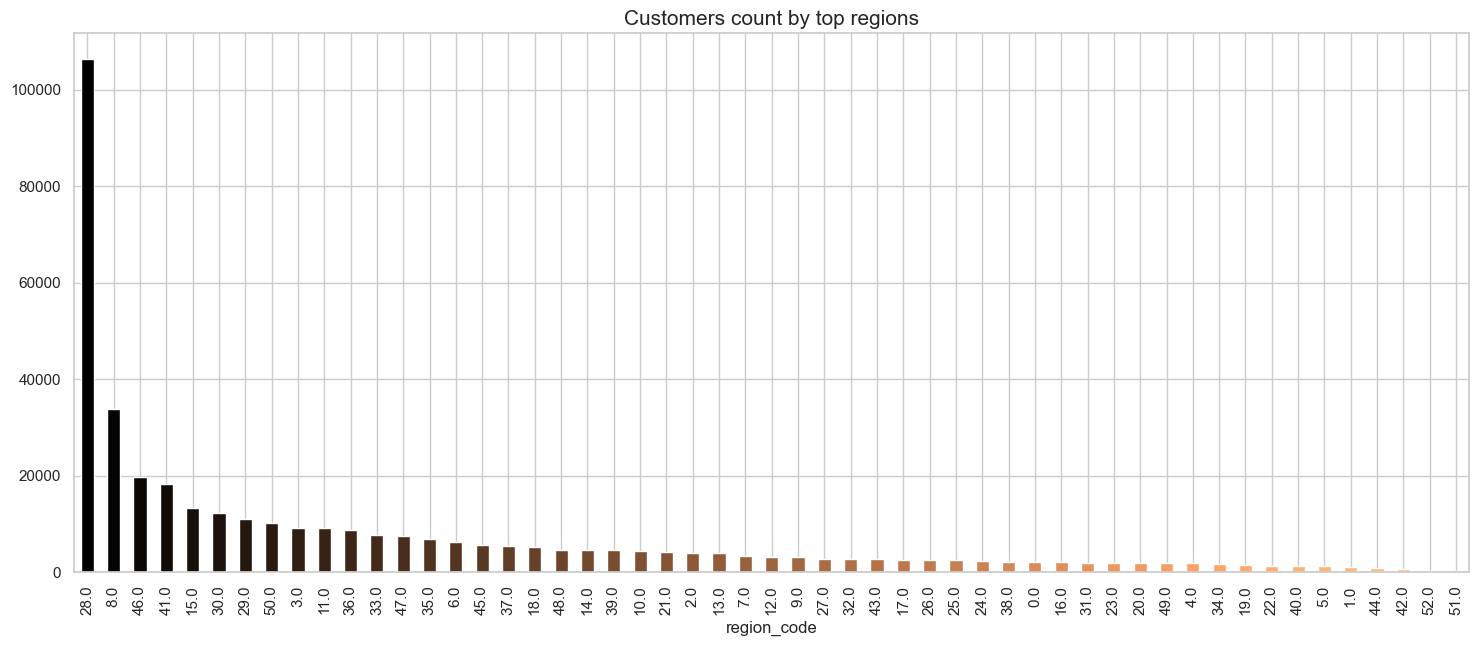

In [20]:
# looking at the frequency of records by sales channel

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 53))
data['region_code'].value_counts().head(53).plot.bar(color = color)
plt.title('Customers count by top regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

C:\Users\Bhavishya Koluguri\AppData\Local\Temp\ipykernel_16284\2659145179.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Insured Customers (54.1%)', 'Not Insured Customers (45.9%)'])


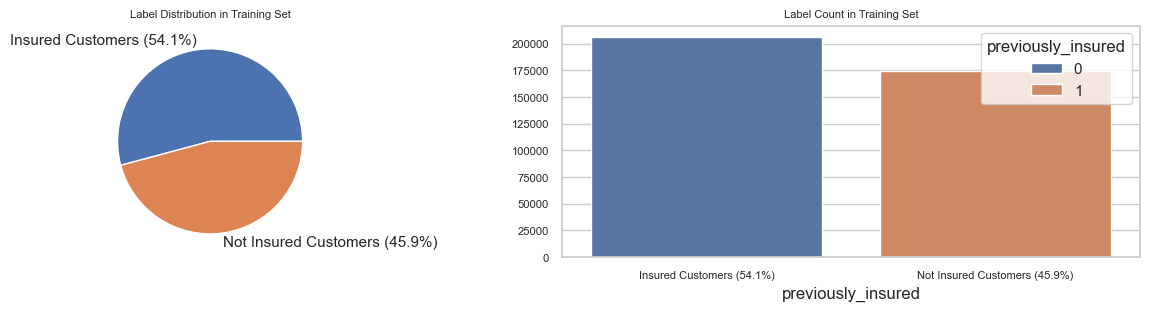

In [21]:
fig, axes = plt.subplots(ncols = 2, figsize = (13, 3), dpi = 100)
plt.tight_layout()

data.groupby('previously_insured').count()['id'].plot(kind = 'pie', ax = axes[0], labels = ['Insured Customers (54.1%)', 'Not Insured Customers (45.9%)'])
sns.countplot(x = data['previously_insured'], hue = data['previously_insured'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Insured Customers (54.1%)', 'Not Insured Customers (45.9%)'])
axes[0].tick_params(axis = 'x', labelsize = 8)
axes[0].tick_params(axis = 'y', labelsize = 8)
axes[1].tick_params(axis = 'x', labelsize = 8)
axes[1].tick_params(axis = 'y', labelsize = 8)

axes[0].set_title('Label Distribution in Training Set', fontsize = 8)
axes[1].set_title('Label Count in Training Set', fontsize =8)

plt.show()

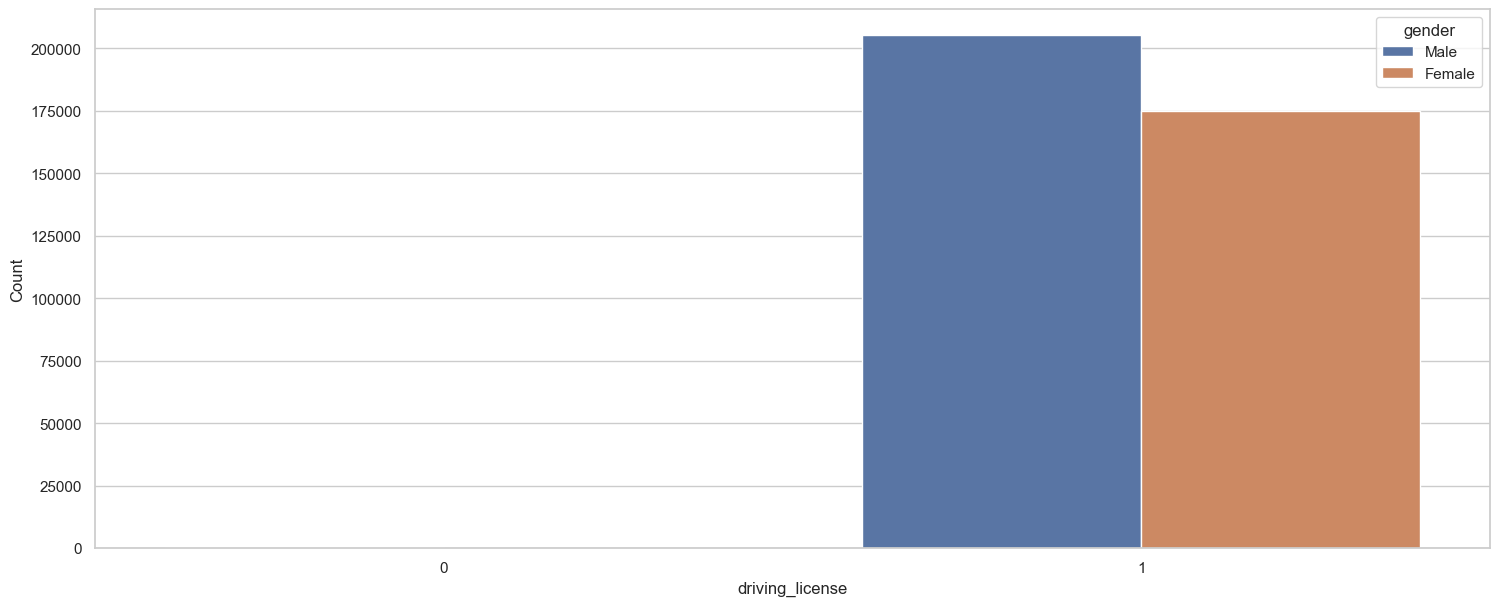

In [22]:
sns.countplot(data = data, x = 'driving_license', hue = 'gender')
plt.ylabel('Count')
plt.show()

We should oversample the minority class to account for customers without driving license.

<font size="+3" color='#540b11'><b> Data Preprocessing </b> </font>

In [23]:
# Unique values for all the columns
for col in data.columns[~(data.columns.isin(['age', 'id', 'region_code', 'annual_premium', 'policy_sales_channel', 'vintage']))].tolist():
    print(" Unique Values --> " + col, ':', len(data[col].unique()), ': ', data[col].unique())

 Unique Values --> gender : 2 :  ['Male' 'Female']
 Unique Values --> driving_license : 2 :  [1 0]
 Unique Values --> previously_insured : 2 :  [0 1]
 Unique Values --> vehicle_age : 3 :  ['> 2 Years' '1-2 Year' '< 1 Year']
 Unique Values --> vehicle_damage : 2 :  ['Yes' 'No']
 Unique Values --> response : 2 :  [1 0]


In [24]:
gender = {'Male': 0, 'Female': 1}
driving_license = {0: 0, 1: 1}
previously_insured = {0: 1, 1: 0}
vehicle_age = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
vehicle_damage = {'Yes': 1, 'No': 0}

data['gender'] = data['gender'].map(gender)
data['driving_license'] = data['driving_license'].map(driving_license)
data['previously_insured'] = data['previously_insured'].map(previously_insured)
data['vehicle_age'] = data['vehicle_age'].map(vehicle_age)
data['vehicle_damage'] = data['vehicle_damage'].map(vehicle_damage)

data['policy_sales_channel'] = data['policy_sales_channel'].apply(lambda x: int(x))
data['region_code'] = data['region_code'].apply(lambda x: int(x))

data.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,0,44,1,28,1,2,1,40454.0,26,217,1
1,2,0,76,1,3,1,1,0,33536.0,26,183,0
2,3,0,47,1,28,1,2,1,38294.0,26,27,1
3,4,0,21,1,11,0,0,0,28619.0,152,203,0
4,5,1,29,1,41,0,0,0,27496.0,152,39,0


### Correlation with target variable

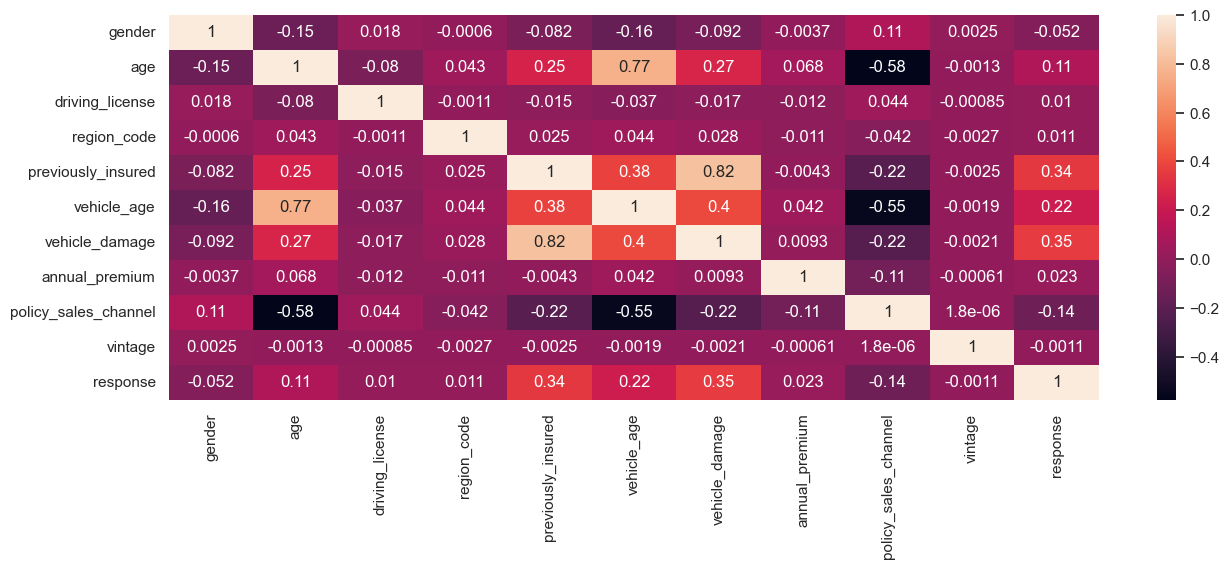

In [41]:
fig, ax = plt.subplots(figsize=(15, 5))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()

It appears 'policy sales channel` and `gender` are more negatively correlated to the target variable `response`

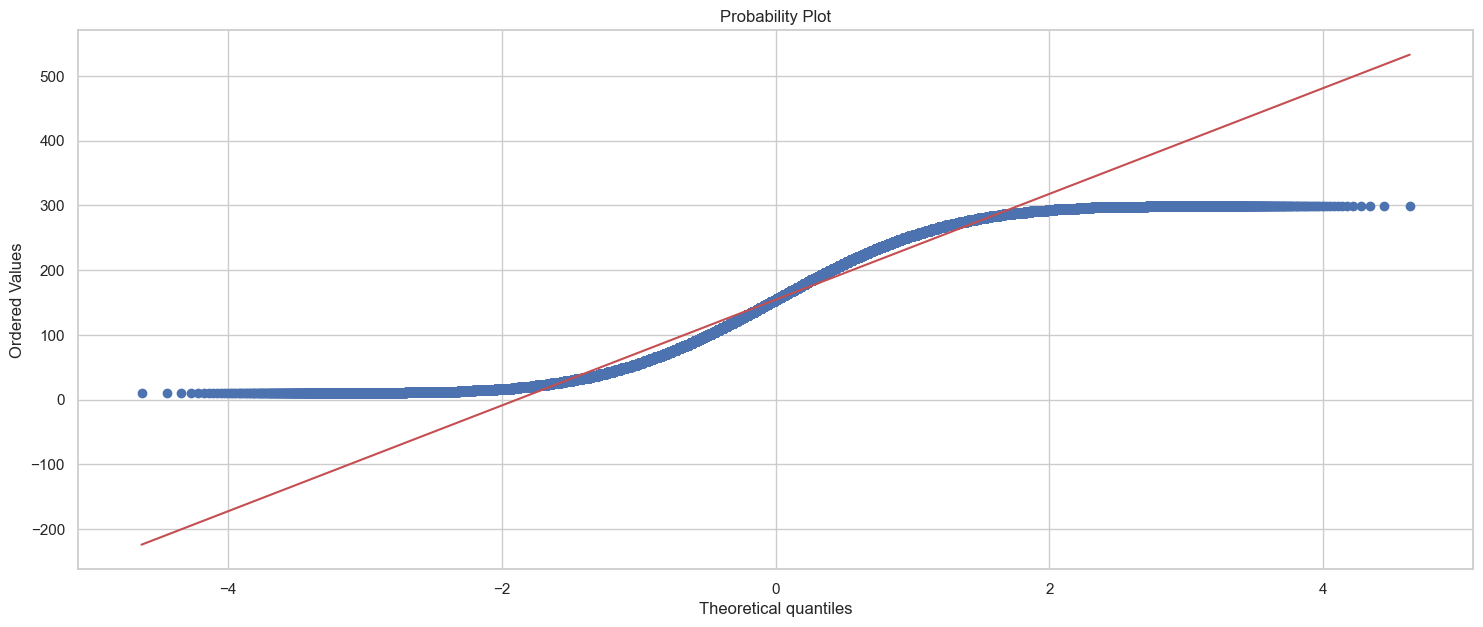

In [26]:
import scipy.stats as stats
import pylab

# Assuming 'data' is your DataFrame and 'column' is the numerical column
stats.probplot(data['vintage'], dist="norm", plot=pylab)
plt.show()

In [27]:
data.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,0,44,1,28,1,2,1,40454.0,26,217,1
1,2,0,76,1,3,1,1,0,33536.0,26,183,0
2,3,0,47,1,28,1,2,1,38294.0,26,27,1
3,4,0,21,1,11,0,0,0,28619.0,152,203,0
4,5,1,29,1,41,0,0,0,27496.0,152,39,0


In [28]:
data = data.drop('id', axis=1)

In [29]:
from sklearn.model_selection import train_test_split
# Separate features and target variable
X = data.drop('response', axis=1)
y = data['response']

# Split the data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline

# Assuming X_train, y_train are your feature and target matrices
# Define the resampling steps in a pipeline
resampling_pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=0.5)),  # Adjust the sampling strategy as needed
    ('undersample', TomekLinks())
])

# Fit and transform the training set
X_resampled, y_resampled = resampling_pipeline.fit_resample(X_temp, y_temp)

In [30]:
x_train, x_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Numerical columns
numerical_cols = ['age', 'vintage']

# categorical column
cat_col = ['gender', 'driving_license', 'region_code', 'previously_insured', 'vehicle_age', 'vehicle_damage', 'policy_sales_channel']

#x_train['policy_sales_channel'] = x_train['policy_sales_channel'].map(x_train['policy_sales_channel'].value_counts())
#x_train['region_code'] = x_train['region_code'].map(x_train['region_code'].value_counts())

ss = StandardScaler()
x_train[numerical_cols] = ss.fit_transform(x_train[numerical_cols])

mm = MinMaxScaler()
x_train[['annual_premium']] = mm.fit_transform(x_train[['annual_premium']])

In [32]:
for column in cat_col:
    data[column] = data[column].astype('str')

In [33]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353308 entries, 39955 to 235057
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                353308 non-null  int64  
 1   age                   353308 non-null  float64
 2   driving_license       353308 non-null  int64  
 3   region_code           353308 non-null  int64  
 4   previously_insured    353308 non-null  int64  
 5   vehicle_age           353308 non-null  int64  
 6   vehicle_damage        353308 non-null  int64  
 7   annual_premium        353308 non-null  float64
 8   policy_sales_channel  353308 non-null  int64  
 9   vintage               353308 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 29.7 MB


<font size="+3" color='#540b11'><b> Data Modelling and Evaluation </b> </font>

In [34]:
!pip install catboost

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report

Decision Tree

In [36]:
x_train.describe()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage
count,353308.000000,3.533080e+05,353308.000000,353308.000000,353308.000000,353308.000000,353308.000000,353308.000000,353308.000000,3.533080e+05
mean,0.385901,-1.088616e-16,0.997900,26.464009,0.650962,0.648089,0.614710,0.052401,107.340454,1.456650e-16
std,0.486808,1.000001e+00,0.045779,12.616142,0.476667,0.547156,0.486664,0.032419,55.116122,1.000001e+00
min,0.000000,-1.348862e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.727304e+00
25%,0.000000,-9.388750e-01,1.000000,16.000000,0.000000,0.000000,0.000000,0.040680,26.000000,-8.761696e-01
50%,0.000000,-5.057064e-02,1.000000,28.000000,1.000000,1.000000,1.000000,0.054562,124.000000,-1.060182e-03
75%,1.000000,6.327404e-01,1.000000,34.000000,1.000000,1.000000,1.000000,0.069222,152.000000,8.620615e-01
max,1.000000,3.092660e+00,1.000000,52.000000,1.000000,2.000000,1.000000,1.000000,163.000000,1.737171e+00


In [37]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 353308 entries, 39955 to 235057
Series name: response
Non-Null Count   Dtype
--------------   -----
353308 non-null  int64
dtypes: int64(1)
memory usage: 5.4 MB


In [38]:
y_val.info()

<class 'pandas.core.series.Series'>
Index: 88328 entries, 44925 to 92379
Series name: response
Non-Null Count  Dtype
--------------  -----
88328 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [39]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_val)
dt_f1_score = f1_score(y_val, dt_predictions, average='weighted')
print(dt_f1_score)
#print(confusion_matrix(y_train, dt_predictions))

0.5702989388812705


Hyperparmeter tuning for decision tree

In [42]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['No Disease', "Disease"],
                       filled=True)

In [48]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_val, dt_classifier.predict(x_val)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_val, dt_classifier.predict(x_val)))

In [45]:
# Create the parameter grid based on the results of random search
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [46]:
grid_search_dt = GridSearchCV(estimator=dt_model,
                            param_grid=params,
                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [47]:
dt_best = grid_search_dt.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
print(dt_best)

In [ ]:
gph = get_dt_graph(dt_best)

In [ ]:
evaluate_model(dt_best)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, dt_best.predict(x_val)))

## ROC Curve & AUC of Decision Tree classifier

---



In [ ]:
%pylab inline
y_score = dt_model.predict_proba(x_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

title('Decission Tree ROC curve: Before HP Tuning')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
roc_auc_score(y_val, y_score)

In [ ]:
y_score = dt_best.predict_proba(x_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

title('Decission Tree ROC curve: After HP Tuning')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
Importance_dt = pd.DataFrame({"Importance": dt_best.feature_importances_*100},
                         index = x_train.columns)
Importance_dt.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels")

In [ ]:
filename = 'dt_model.sav'
pickle.dump(dt_best, open(filename, 'wb'))

In [ ]:
filename = 'dt_best.sav'

# Random Forest Classifier

In [49]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Bhavishya Koluguri\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['randint', 'pylab', 'fmin', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [50]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_val)
rf_f1_score = f1_score(y_val, rf_predictions, average='weighted')

In [51]:
print(rf_f1_score)

0.5730795406645885


In [52]:
print(classification_report(rf_predictions, y_val))

              precision    recall  f1-score   support

           0       0.90      0.67      0.76     78162
           1       0.14      0.40      0.20     10166

    accuracy                           0.64     88328
   macro avg       0.52      0.53      0.48     88328
weighted avg       0.81      0.64      0.70     88328



##Hyperparameter tuning for Random Forest

In [ ]:
param_grid =  {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'max_features': ['sqrt', 'log2', None],
               'min_samples_split': [5, 7,10],
               'max_leaf_nodes': [3, 6, 9],
               'n_estimators': [25, 50, 100, 150]}
random_search = RandomizedSearchCV(rf_model, param_grid, verbose= 1, random_state=42, n_jobs = -1)
random_search.fit(x_train,y_train)
print(random_search.best_estimator_)

In [ ]:
evaluation = [( x_train, y_train), ( x_val, y_val)]

rf_best = random_search.best_estimator_

pred = rf_best.predict(x_val)
y_score = rf_best.predict_proba(x_val)[:,1]
accuracy = accuracy_score(y_val, pred>0.5)
Roc_Auc_Score = roc_auc_score(y_val, y_score)
print ("ROC-AUC Score:",Roc_Auc_Score)
print ("SCORE:", accuracy)
print ({'loss': -Roc_Auc_Score, 'status': STATUS_OK })

## ROC Curve & AUC of Random forest classifier

In [ ]:
y_score = rf_model.predict_proba(x_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

title('Random Forest ROC curve: Before HP Tuning')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
roc_auc_score(y_val, y_score)

In [ ]:
y_score = rf_best.predict_proba(x_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

title('Random Forest ROC curve: After HP Tuning')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
Importance_dt = pd.DataFrame({"Importance": rf_best.feature_importances_*100},
                         index = x_train.columns)
Importance_dt.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels")

In [ ]:
filename = 'rf_best.sav'
pickle.dump(rf_best, open(filename, 'wb'))

In [ ]:
filename = 'rf_model.sav'

In [ ]:
rf_load = pickle.load(open(filename, 'rb'))

In [ ]:
gph = get_dt_graph(rf_best.estimators_[0])

# Evaluate Model

In [ ]:
y_pred=rf_best.predict(X_test)

In [ ]:
y_score = rf_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('Random Forest ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
roc_auc_score(y_test, y_score)

In [ ]:
## Checking Feature importance

#plt.figure(figsize=(20,15))
#importance = clf.feature_importances_
#idxs = np.argsort(importance)
#plt.title("Feature Importance")
#plt.barh(range(len(idxs)),importance[idxs],align="center")
#plt.yticks(range(len(idxs)),[x_train.columns.to_list()[i] for i in idxs])
#plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
#plt.show()

# XGBoost Classifier

In [57]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(learning_rate=0.1, n_estimators=100, reg_lambda=1, random_state=42)
print(xgbc)

xgbc.fit(x_train, y_train)

# - cross validataion
xgb_scores = cross_val_score(xgbc, x_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % xgb_scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
xgb_kf_cv_scores = cross_val_score(xgbc, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % xgb_kf_cv_scores.mean())

xgb_ypred = xgbc.predict(x_val)
xgb_cm = confusion_matrix(y_val,xgb_ypred)
print(xgb_cm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Mean cross-validation score: 0.82
K-fold CV average score: 0.82
[[57344   888]
 [26946  3150]]


In [58]:
xgb_f1_score = f1_score(y_val, xgb_ypred, average='weighted')
print(xgb_f1_score)

0.5934045078072137


In [59]:
print(classification_report(xgb_ypred, y_val))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     84290
           1       0.10      0.78      0.18      4038

    accuracy                           0.68     88328
   macro avg       0.54      0.73      0.49     88328
weighted avg       0.94      0.68      0.78     88328



In [60]:
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

xgb_rs = RandomizedSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
xgb_rs.fit(x_train, y_train)

C:\Users\Bhavishya Koluguri\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\Bhavishya Koluguri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bhavishya Koluguri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729,

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'base_score': [0.2, 0.5, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'gamma': [0, 0.5, 1],
                                        'learning_rate': [0.05, 0.1],
                                        'n_estimators': [100, 200],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [0.5, 1, 5]},
                   scoring='roc_auc')

In [ ]:
best_params = xgb_rs.best_params_
print(f"Best Hyperparameters: {best_params}")

In [ ]:
xgb_best = xgb_rs.best_estimator_

In [ ]:
filename = 'xgboost_model.sav'
pickle.dump(xgb_best, open(filename, 'wb'))

In [ ]:
xgb_best = pickle.load(open(filename, 'rb'))

In [ ]:
xgb_y_pred = xgb_best.predict(x_val)

## ROC Curve & AUC of XG boost classifier

In [ ]:
%pylab inline
y_score = xgbc.predict_proba(x_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

title('XGBoost ROC curve - Before HP Tuning')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
y_score = xgb_best.predict_proba(x_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

title('XGB ROC curve: After HP Tuning')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
evaluate_model(xgb_best)

In [ ]:
print(classification_report(y_val, xgb_best.predict(x_val)))

In [ ]:
Importance_dt = pd.DataFrame({"Importance": xgb_best.feature_importances_*100},
                         index = x_train.columns)
Importance_dt.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels")

In [ ]:
filename = 'xgb_best.sav'
pickle.dump(xgb_best, open(filename, 'wb'))

In [ ]:
y_score = xgb_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('XGBoost ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

##LGBM

In [ ]:
random_state=42
n_iter=50
num_folds=2
kf = KFold(n_splits=num_folds, random_state=random_state,shuffle=True)

In [ ]:
def gb_mse_cv(params, random_state=random_state, cv=kf, X=x_train, y=y_train):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']),
              'max_depth': int(params['max_depth']),
              'learning_rate': params['learning_rate'],
              'gamma': params['gamma'],
              'reg_alpha' : params['reg_alpha'],
              'reg_lambda' : params['reg_lambda'],
              'colsample_bytree' : params['colsample_bytree'],
              'min_child_weight' : params['min_child_weight']
             }



    # we use this params to create a new LGBM Regressor
    model = lgb.LGBMClassifier(random_state=42, **params)

    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1).mean()

    return score

In [ ]:
# build the lightgbm model
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(x_train, y_train)

In [ ]:
# predict the results
y_pred=lgbm.predict(x_val)

accuracy=accuracy_score(y_pred, y_val)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_val, y_pred)))

lgbm_cm = confusion_matrix(y_val, y_pred)
print('Confusion matrix\n\n', lgbm_cm)

In [ ]:
print(classification_report(y_val, y_pred))

In [ ]:
!pip install optuna

In [ ]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)
lgb_predictions = lgb_model.predict(x_val)
lgb_f1_score = f1_score(y_val, lgb_predictions, average='weighted')
print(classification_report(lgb_predictions, y_val))

In [ ]:
!pip install verstack

In [ ]:
x_train.head()

In [ ]:
from verstack import LGBMTuner
# tune the hyperparameters and fit the optimized model
tuner = LGBMTuner(metric = 'f1_weighted') # <- the only required argument
tuner.fit(x_train, y_train)
# check the optimization log in the console.
pred = tuner.predict(x_val)

In [ ]:
tuner.plot_importances(interactive = True)

In [ ]:
tuner.plot_intermediate_values(interactive = True)

In [ ]:
tuner.plot_param_importances(interactive = True)

In [ ]:
tuner.best_params

In [ ]:
tuner.fitted_model

In [ ]:
import optuna
from optuna.samplers import TPESampler

def objective(trial):
    """
    Objective function to be minimized.
    """
    param = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_class": 3,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    gbm = lgb.LGBMClassifier(**param)
    gbm.fit(x_train, y_train)
    preds = gbm.predict(x_val)
    gbm_f1 = f1_score(y_val, preds)
    return gbm_f1

sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="lightgbm", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

In [ ]:
%%time

# possible values of parameters


# trials will contain logging information
trials = Trials()


best=fmin(fn=gb_mse_cv(space), # function to optimize
          space=space,
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=n_iter, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.seed(random_state) # fixing random state for the reproducibility
         )

# computing the score on the test set
model_lgb = lgb.LGBMClassifier(random_state=random_state, n_estimators=int(best['n_estimators']),
                           max_depth=int(best['max_depth']),learning_rate=best['learning_rate'],gamma=best['gamma'],
                           reg_alpha=best['reg_alpha'],reg_lambda=best['reg_lambda'],colsample_bytree=best['colsample_bytree'],
                           min_child_weight=best['min_child_weight'])
model_lgb.fit(x_train,y_train)

preds = [pred[1] for pred in model_lgb.predict_proba(x_val)]
score = roc_auc_score(y_val, preds, average = 'weighted')


In [ ]:
best

In [ ]:
print("auc-roc score on Test data",score)

In [ ]:
y_score = tuner.predict_proba(x_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

title('LGBM ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
## Checking Feature importance

plt.figure(figsize=(20,15))
importance = model_lgb.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[x_train.columns.to_list()[i] for i in idxs])
plt.xlabel("LGB Feature Importance")
#plt.tight_layout()
plt.show()

# CatBoost

In [53]:
#X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, Y_cat, test_size = 0.22, random_state = 22, stratify = Y_cat, shuffle = True)


cat_model = CatBoostClassifier()
cat_model = cat_model.fit(x_train, y_train, eval_set = (x_val, y_val), early_stopping_rounds = 10, verbose = 100)

predictions = [pred[1] for pred in cat_model.predict_proba(x_val)]
print('Validation ROC AUC Score:', roc_auc_score(y_val, predictions, average = 'weighted'))

Learning rate set to 0.13499
0:	learn: 0.5619675	test: 0.5554996	best: 0.5554996 (0)	total: 318ms	remaining: 5m 17s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.4599768915
bestIteration = 11

Shrink model to first 12 iterations.
Validation ROC AUC Score: 0.8354324802501301


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


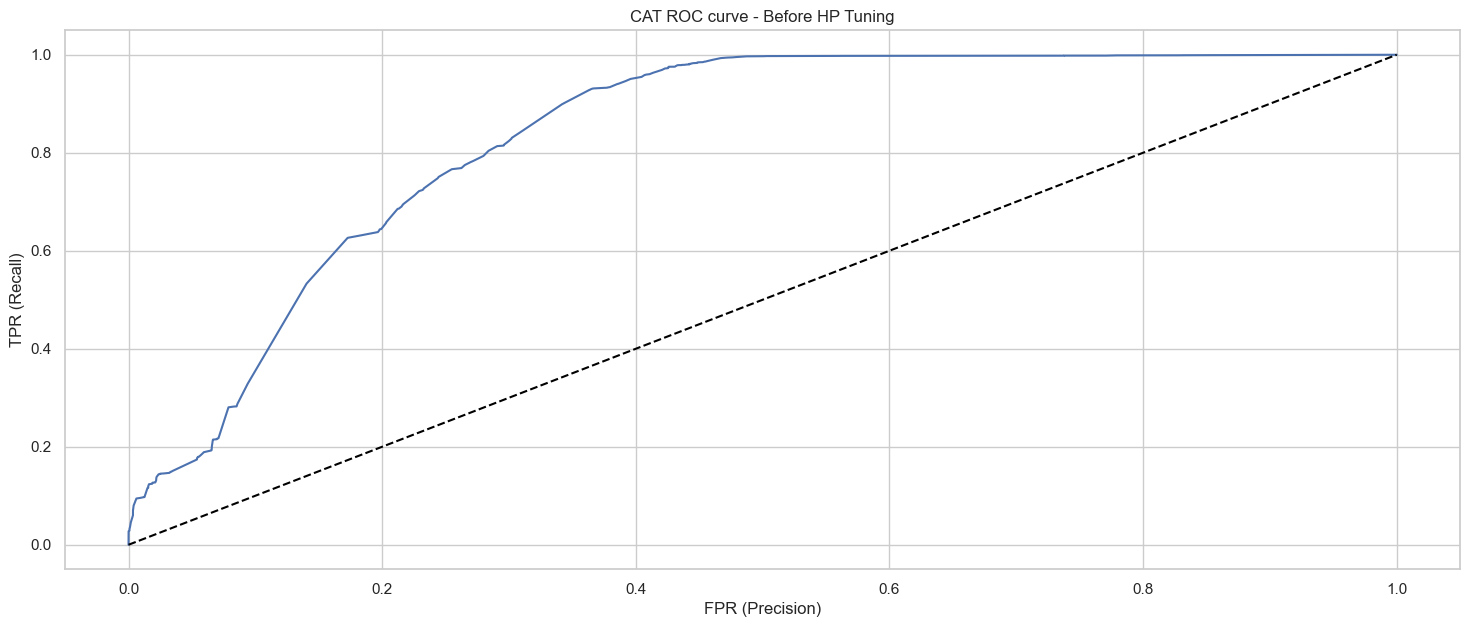

Area under curve (AUC):  0.8354324802501301


In [54]:
%pylab inline
y_score = cat_model.predict_proba(x_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

title('CAT ROC curve - Before HP Tuning')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [55]:
param_dist = {'max_depth': [3,4,5],
              'n_estimators':[100, 200, 300]}

cat_rs = RandomizedSearchCV(cat_model, param_dist, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
cat_rs.fit(x_train, y_train)

C:\Users\Bhavishya Koluguri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Learning rate set to 0.380606
0:	learn: 0.4534076	total: 124ms	remaining: 37.2s
1:	learn: 0.4235307	total: 260ms	remaining: 38.7s
2:	learn: 0.4037701	total: 405ms	remaining: 40.1s
3:	learn: 0.3918068	total: 561ms	remaining: 41.5s
4:	learn: 0.3855437	total: 706ms	remaining: 41.6s
5:	learn: 0.3813959	total: 852ms	remaining: 41.7s
6:	learn: 0.3785478	total: 978ms	remaining: 40.9s
7:	learn: 0.3765967	total: 1.15s	remaining: 41.9s
8:	learn: 0.3750445	total: 1.28s	remaining: 41.5s
9:	learn: 0.3712785	total: 1.46s	remaining: 42.3s
10:	learn: 0.3695663	total: 1.59s	remaining: 41.8s
11:	learn: 0.3684812	total: 1.73s	remaining: 41.6s
12:	learn: 0.3661744	total: 1.87s	remaining: 41.2s
13:	learn: 0.3635461	total: 2s	remaining: 40.9s
14:	learn: 0.3615832	total: 2.14s	remaining: 40.6s
15:	learn: 0.3610257	total: 2.3s	remaining: 40.8s
16:	learn: 0.3601409	total: 2.43s	remaining: 40.4s
17:	learn: 0.3594720	total: 2.64s	remaining: 41.3s
18:	learn: 0.3581718	total: 2.84s	remaining: 42.1s
19:	learn: 0.35

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002065ECB9590>,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc')

In [56]:
best_cat_params = cat_rs.best_params_
print(f"Best Hyperparameters: {best_cat_params}")

Best Hyperparameters: {'n_estimators': 300, 'max_depth': 5}


In [ ]:
cat_best = cat_rs.best_estimator_

In [ ]:
cat_y_pred = cat_best.predict(x_val)

In [ ]:
%pylab inline
y_score = cat_best.predict_proba(x_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_score)

title('CAT ROC curve - After HP Tuning')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
print(classification_report(y_val, cat_y_pred))

In [ ]:
Importance_dt = pd.DataFrame({"Importance": cat_best.feature_importances_*100},
                         index = x_train.columns)
Importance_dt.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels")

In [ ]:
cat_y_pred = cat_best.predict(X_test)

In [ ]:
y_score = cat_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('CatBoost ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

### Predicting Optimal Threshold for XG Boost

In [105]:
pred = []
for model in [xgbc]:
    pred.append(pd.Series(model.predict_proba(X_test)[:, 1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}', format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: {} 0.7458847135537507


In [106]:
pd.concat(pred,axis=1)

,0
0,0.393821
1,0.022020
2,0.004634
3,0.026910
4,0.124429
...,...
38106,0.344528
38107,0.442598
38108,0.088872
38109,0.016977


In [107]:
final_prediction

0        0.393821
1        0.022020
2        0.004634
3        0.026910
4        0.124429
           ...   
38106    0.344528
38107    0.442598
38108    0.088872
38109    0.016977
38110    0.009123
Length: 38111, dtype: float32

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
gmeans = sqrt(tpr*(1-fpr))
ix = argmax(gmeans)
thresholds

array([          inf, 8.0460566e-01, 7.9090589e-01, ..., 7.3175365e-04,
       7.1878557e-04, 4.2027701e-04], dtype=float32)

In [109]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False , inplace=True)
accuracy_ls.head()

,thresholds,accuracy
0,inf,0.877437
1,0.804606,0.877437
2,0.790906,0.877411
3,0.781404,0.877358
4,0.772712,0.877358


In [110]:
accuracy_ls

,thresholds,accuracy
0,inf,0.877437
1,0.804606,0.877437
2,0.790906,0.877411
3,0.781404,0.877358
4,0.772712,0.877358
...,...,...
3008,0.000784,0.123534
3009,0.000761,0.123508
3010,0.000732,0.122904
3011,0.000719,0.122878


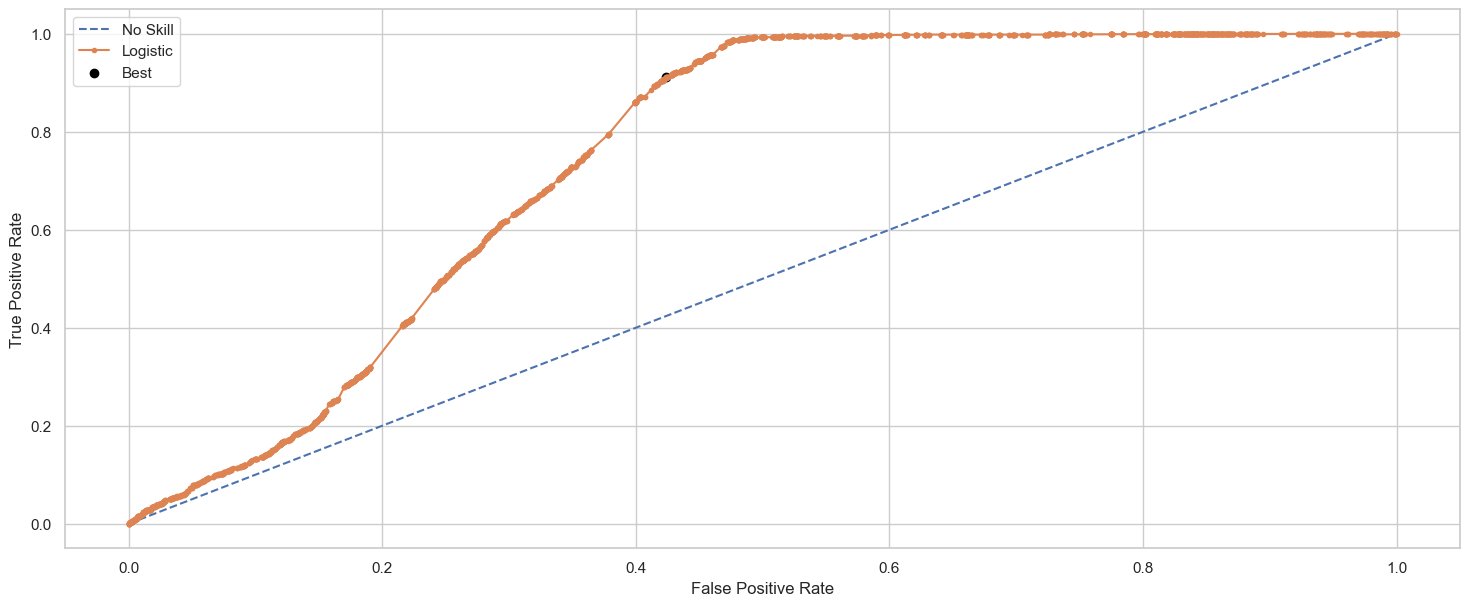

Area under curve (AUC):  0.7458847135537507


In [111]:
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))